In [1]:
# Import package dependencies
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ml_metrics import rmse
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Ridge

# Load data

In [2]:
dt = pd.read_csv('./data/train.csv')
du= pd.read_csv('./data/unique_m.csv')

# Exploration

In [3]:
print(dt.shape)
dt.head()

(21263, 82)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
p = dt.describe()
p

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


# Check for missing data

In [5]:
for i in dt.columns:
    if p.loc["count", i] != dt.shape[0]:
        print (i)
print("No missing data")

No missing data


# Delete the response

In [6]:
del du['critical_temp']
print(du.shape)
du.head()

(21263, 87)


,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.3La1.7Cu1O4


# Using the material columns because it is strem, and is variable for each row, so the decision was no to use it

In [7]:
f= du.iloc[:, 0:86]

# Check for missing data in the second datafile

In [8]:
d = f.describe()
d

,H,He,Li,Be,B,C,N,O,F,Ne,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
count,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0
mean,0.017685,0.0,0.012125,0.034638,0.142594,0.384968,0.013284,3.009129,0.014874,0.0,...,0.061558,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0
std,0.267220,0.0,0.129552,0.848541,1.044486,4.408032,0.150427,3.811649,0.132119,0.0,...,0.864859,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
max,14.000000,0.0,3.000000,40.000000,105.000000,120.000000,12.800000,66.000000,4.000000,0.0,...,45.000000,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0


In [9]:
for i in d.columns:
    if d.loc["count", i] != du.shape[0]:
        print (i)
print("No missing data")

No missing data


# Merged the 2 data file by the row index

In [10]:
# Merge two Dataframes on index of both the dataframes
mergedDf = dt.merge(du, left_index=True, right_index=True)

# Check the merged data

In [11]:
print(mergedDf.shape)
mergedDf.head()

(21263, 169)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.3La1.7Cu1O4


In [12]:
mergedDf.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,0.061558,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,0.864859,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,45.000000,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0


In [13]:
mergedDf.dtypes

number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
Bi                       float64
Po                         int64
At                         int64
Rn                         int64
material                  object
Length: 169, dtype: object

# Explorate each column with pandas profiling

In [14]:
profile = ProfileReport(mergedDf, minimal=True)
profile.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/178 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Response

In [862]:
response= mergedDf["critical_temp"]
del mergedDf['critical_temp']
response.shape

(21263,)

# Split the data in train and test

In [863]:
# index to left out the material column
sc= mergedDf.iloc[:, 0:167]
sc["Critical_Temperature"]= response
sc.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,Critical_Temperature
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0


In [864]:
# Create training and testing sets (cross-validation not needed)
train_set = sc.sample(frac=0.7, random_state=100)
test_set = sc[~sc.isin(train_set)].dropna()
print(train_set.shape[0])
print(test_set.shape[0])

14884
6379


In [865]:
# Get the training and testing row indices for later use
train_index = train_set.index.values.astype(int)
test_index = test_set.index.values.astype(int)

In [866]:
# Converting the training and testing datasets back to matrix-formats
X_train = train_set.iloc[:, 0:167].values # returns the data; excluding the target
Y_train = train_set.iloc[:, -1].values # returns the target-only
X_test = test_set.iloc[:, 0:167].values # ""
Y_test = test_set.iloc[:, -1].values # ""

# Normalization of the train data

In [867]:
x = X_train
min_max_scaler = preprocessing.RobustScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaled)


# Normalization of the test data

In [868]:
x = X_test
min_max_scaler = preprocessing.RobustScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_test= pd.DataFrame(x_scaled)


# Lasso regularization

# Using grid

In [869]:
l1_mod = linear_model.Lasso()
parameters = {'fit_intercept':[True], 'normalize':[True,False], 'copy_X':[True],'alpha':[0.01, 0.1]}
grid = GridSearchCV(l1_mod,parameters, cv=None)
grid.fit(X_train, Y_train)
print( "r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - Y_test) ** 2))

print(grid.score(X_train, Y_train))
#print(grid.coef_)
#print(grid.intercept_)
print(grid.best_params_)

/Users/fabiosavorgnan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224352.4446244724, tolerance: 1418.8060346500554
  positive)
/Users/fabiosavorgnan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171435.69745641155, tolerance: 1402.41922264583
  positive)
/Users/fabiosavorgnan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207730.66998688877, tolerance: 1407.962790436093
  positive)
/Users/fabiosavorgnan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Obje

r2 / variance :  0.6602192453115909
Residual sum of squares: 316.64
0.7430120841983289
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [870]:
l1_mod = linear_model.Lasso(copy_X= True, fit_intercept= True, normalize= False, alpha= 0.1).fit(X_train, Y_train)
print(l1_mod.score(X_train, Y_train))
print(l1_mod.coef_)
print(l1_mod.intercept_)
print(l1_mod.get_params())

0.7430120841983289
[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  3.02616028e+00  1.25286465e+01
 -2.14108169e+00  0.00000000e+00 -6.78478647e+00  8.52261285e-01
  0.00000000e+00  1.26293629e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -6.55215640e-01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.74890679e+00
 -1.07032200e+00  0.00000000e+00  3.71631660e+00 -1.40816887e+00
  0.00000000e+00 -5.33353717e-01  0.00000000e+00 -8.54821895e-01
  0.00000000e+00 -0.00000000e+00  1.83744759e+00 -0.00000000e+00
 -6.13169206e-01  7.11426917e-01  0.00000000e+00  0.00000000e+00
 -3.69754243e+00 -0.00000000e+00 -3.76464114e+00 -3.21827696e+00
 -2.32563011e+00  4.62779262e+00 -1.60986001e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  4.70201963e+00 -0.00000000e+00  9.92895365e-01 -0.00000000e+00
 -1.23

# Interpret the weights

In [871]:
# iterate over the coefficients
weights = l1_mod.coef_.T # take transpose to make a column vector
variable_names = sc.columns
for coef, name in zip(weights,variable_names):
    if coef > 12 or coef < -12 :
        print(name, 'has weight of', coef)
    


range_atomic_mass has weight of 12.528646477591622
wtd_mean_ThermalConductivity has weight of 16.478282011696912
wtd_gmean_ThermalConductivity has weight of -15.403076216554526


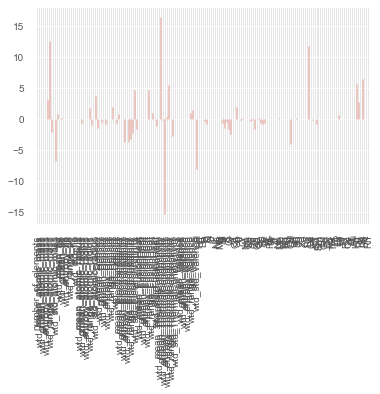

In [872]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(weights,index=normalize_df.columns[0:167])
weights.plot(kind='bar')
plt.show()

# Predict

In [873]:
Y_pred2 = l1_mod.predict(X_test)

orig_mae2 = mean_absolute_error(Y_test,Y_pred2)
orig_mse2 = mean_squared_error(Y_test,Y_pred2)
orig_rmse_val2 = rmse(Y_test,Y_pred2)
orig_r22 = r2_score(Y_test,Y_pred2)
print("MAE: %.3f"%orig_mae2)
print("MSE:  %.3f"%orig_mse2)
print("RMSE:  %.3f"%orig_rmse_val2)
print("R2:  %.3f"%orig_r22)

MAE: 13.105
MSE:  316.643
RMSE:  17.794
R2:  0.726


# Try with x train for comparison

In [874]:
Y_pred2_tr = l1_mod.predict(X_train)

orig_mae2_tr = mean_absolute_error(Y_train,Y_pred2_tr)
orig_mse2_tr = mean_squared_error(Y_train,Y_pred2_tr)
orig_rmse_val2_tr = rmse(Y_train,Y_pred2_tr)
orig_r22_tr = r2_score(Y_train,Y_pred2_tr)
print("MAE: %.3f"%orig_mae2_tr)
print("MSE:  %.3f"%orig_mse2_tr)
print("RMSE:  %.3f"%orig_rmse_val2_tr)
print("R2:  %.3f"%orig_r22_tr)

MAE: 13.019
MSE:  303.494
RMSE:  17.421
R2:  0.743


In [875]:
# Find the variable with the largest "normalized" coefficient value
print('The positive(max) coef-value is {}'.format(max(l1_mod.coef_))) # Positive Max
#print('The abs(max) coef-value is {}'.format(max(l1_mod.coef_, key=abs))) # ABS Max
max_var = max(l1_mod.coef_) # Positive Max
#max_var = max(reg.coef_, key=abs) # ABS Max
var_index = l1_mod.coef_.tolist().index(max_var)
print('The variable associated with this coef-value is {}'.format(sc.columns[var_index]))

The positive(max) coef-value is 16.478282011696912
The variable associated with this coef-value is wtd_mean_ThermalConductivity


In [876]:
res_frame1 = pd.DataFrame({'data':'lasso',
                   'imputation':'none',
                   'mae': orig_mae2, 
                   'mse': orig_mse2, 
                   'rmse':orig_rmse_val2, 
                   'R2':orig_r22}, index=[0])
res_frame1 

,data,imputation,mae,mse,rmse,R2
0,lasso,none,13.104817,316.643161,17.79447,0.725914


# Ridge regularization

# Using the grib

In [877]:
l2g_mod = linear_model.Ridge()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(l2g_mod,parameters, cv=None)
grid.fit(X_train, Y_train)
print( "r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - Y_test) ** 2))

print(grid.score(X_train, Y_train))
#print(grid.coef_)
#print(grid.intercept_)
print(grid.best_params_)

r2 / variance :  0.5900026324213178
Residual sum of squares: 454.21
0.6799046661458273
{'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [878]:
l2_mod = Ridge(copy_X=  True, fit_intercept= False, normalize= False).fit(X_train, Y_train)
print(l2_mod.score(X_train, Y_train))
print(l2_mod.coef_)
print(l2_mod.intercept_)
print(l2_mod.get_params())

0.7662080281733603
[ 1.38123961e+01  2.41613335e+01 -4.21069944e+01 -1.03752673e+01
  3.24594036e+01 -8.98120135e+00  3.32973346e+00  1.61825350e+01
  7.03571484e-01 -1.55994974e+01  2.90173047e+00 -3.08762254e+00
  4.87094532e+01 -6.99644500e-01 -2.55101839e+01  2.96141103e+01
  2.24129415e+01  1.18292601e+01  1.10272715e+01 -1.33120134e+01
 -7.99216790e+00 -2.16080007e+01  9.76908287e+01  1.73984877e+01
 -1.12318494e+02 -2.43267096e+01  1.05757592e+01  7.74900529e+00
 -1.86234790e+00 -5.15386797e+00 -5.65684530e+00 -1.03073748e+01
  1.62737313e+01  7.79338431e+00 -1.37140966e+01 -8.85327732e-01
  6.62737078e-01 -3.14698102e+00  1.02344341e+00  5.07256441e+00
 -3.27144642e+00  2.46555978e+00  5.43789023e+00 -3.88797659e-02
 -1.01922066e+01  4.26268167e+00 -5.58865362e+00 -1.80821797e+01
 -4.00728880e+00  2.01683043e+01 -8.27504011e+00  6.77712629e+00
 -2.02185244e+01 -3.17246695e+00  1.51470501e+01 -4.71112978e+00
  9.98920417e+00 -7.51754458e-01  4.15097513e+00 -2.42125075e+00
  1.81

# Interprete the weight

In [879]:
# iterate over the coefficients
weights = l2_mod.coef_.T # take transpose to make a column vector
variable_names = sc.columns
for coef, name in zip(weights,variable_names):
    if coef > 50 or coef < -50:
        print(name, 'has weight of', coef)

wtd_mean_atomic_radius has weight of 97.69082873802915
wtd_gmean_atomic_radius has weight of -112.31849447139517
range_ThermalConductivity has weight of -72.95581647805015
std_ThermalConductivity has weight of 54.04393844894352
wtd_mean_Valence has weight of -51.410576747780524


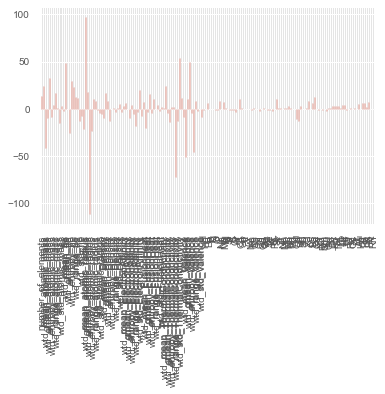

In [880]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(weights,index=normalize_df.columns[0:167])
weights.plot(kind='bar')
plt.show()

# Prediction

In [881]:
Y_pred3 = l2_mod.predict(X_test)

orig_mae3 = mean_absolute_error(Y_test,Y_pred3)
orig_mse3 = mean_squared_error(Y_test,Y_pred3)
orig_rmse_val3 = rmse(Y_test,Y_pred3)
orig_r23 = r2_score(Y_test,Y_pred3)
print("MAE: %.3f"%orig_mae3)
print("MSE:  %.3f"%orig_mse3)
print("RMSE:  %.3f"%orig_rmse_val3)
print("R2:  %.3f"%orig_r23)

MAE: 12.880
MSE:  550.368
RMSE:  23.460
R2:  0.524


# Try the train for comparison

In [882]:
Y_pred3_tr = l2_mod.predict(X_train)

orig_mae3_tr = mean_absolute_error(Y_train,Y_pred3_tr)
orig_mse3_tr = mean_squared_error(Y_train,Y_pred3_tr)
orig_rmse_val3_tr = rmse(Y_train,Y_pred3_tr)
orig_r23_tr = r2_score(Y_train,Y_pred3_tr)
print("MAE: %.3f"%orig_mae3_tr)
print("MSE:  %.3f"%orig_mse3_tr)
print("RMSE:  %.3f"%orig_rmse_val3_tr)
print("R2:  %.3f"%orig_r23_tr)

MAE: 12.488
MSE:  276.100
RMSE:  16.616
R2:  0.766


In [883]:
# Find the variable with the largest "normalized" coefficient value
print('The positive(max) coef-value is {}'.format(max(l2_mod.coef_))) # Positive Max
#print('The abs(max) coef-value is {}'.format(max(l2_mod.coef_, key=abs))) # ABS Max
max_var3 = max(l2_mod.coef_) # Positive Max
#max_var = max(reg.coef_, key=abs) # ABS Max
var_index3 = l2_mod.coef_.tolist().index(max_var3)
print('The variable associated with this coef-value is {}'.format(sc.columns[var_index]))

The positive(max) coef-value is 97.69082873802915
The variable associated with this coef-value is wtd_mean_ThermalConductivity


In [884]:
res_frame2 = pd.DataFrame({'data':'Ridge',
                   'imputation':'none',
                   'mae': orig_mae3, 
                   'mse': orig_mse3, 
                   'rmse':orig_rmse_val3, 
                   'R2':orig_r23}, index=[0])
res_frame = pd.concat([res_frame1, res_frame2])
res_frame

,data,imputation,mae,mse,rmse,R2
0,lasso,none,13.104817,316.643161,17.794470,0.725914
0,Ridge,none,12.880266,550.367504,23.459913,0.523602


In [889]:
mergedDf
col= mergedDf[['Ba','wtd_gmean_ThermalConductivity','wtd_mean_ThermalConductivity' ]]
col

,Ba,wtd_gmean_ThermalConductivity,wtd_mean_ThermalConductivity
0,0.20,0.621979,61.015189
1,0.10,0.619735,61.372331
2,0.10,0.619095,60.943760
3,0.15,0.620535,60.979474
4,0.30,0.624878,61.086617
...,...,...,...
21258,0.00,95.001493,111.537778
21259,2.00,1.577047,108.680590
21260,0.00,57.038314,57.400000
21261,0.00,58.781651,59.270000


In [895]:
#calculate interquartile range for Ba
q3, q1 = np.percentile(mergedDf['Ba'], [75 ,25])
iqr_BA = q3 - q1

#display interquartile range 
iqr_BA


1.35

In [896]:
#calculate interquartile range for Ba
q3, q1 = np.percentile(mergedDf['wtd_gmean_ThermalConductivity'], [75 ,25])
iqr_Ther_gmean = q3 - q1

#display interquartile range 
iqr_Ther_gmean


46.220757864326025

In [897]:
#calculate interquartile range for Ba
q3, q1 = np.percentile(mergedDf['wtd_mean_ThermalConductivity'], [75 ,25])
iqr_Ther_mean = q3 - q1

#display interquartile range 
iqr_Ther_mean

44.881957804581404